In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
song_data = pd.read_csv("../Data/Most_Streamed_Spotify_Songs_2024.csv", encoding = 'unicode_escape')
song_data.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [3]:
#Split dates in Release Date Column 
#Split Month to Month Column 
#Split Year Column 

#Converting Release Date Column to DateTime Format 
song_data['Release Date']=pd.to_datetime(song_data['Release Date'])
song_data.dtypes

#Extracting Month and Year
song_data['Month']= song_data['Release Date'].dt.month
song_data['Year']= song_data['Release Date'].dt.year
song_data.head(3)


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Month,Year
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0,4,2024
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1,5,2024
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0,3,2024


In [4]:
#Create bins for seasons and update Df with Season Name 

bins= [0,3,6,9,12]
season_names = ["Winter","Spring","Summmer","Fall"]
song_data["Seasons"]= pd.cut(song_data["Month"],bins,labels=season_names, include_lowest=True)
song_data.head(3)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Month,Year,Seasons
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0,4,2024,Spring
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1,5,2024,Spring
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0,3,2024,Winter


In [6]:
#Convert columns to string, replace commas 
columns_to_convert = ['Spotify Streams', 'All Time Rank', 'Spotify Playlist Count','Spotify Playlist Reach','Deezer Playlist Reach',
                      'Amazon Playlist Count', 'Pandora Track Stations', 'Pandora Streams','Soundcloud Streams','Shazam Counts','YouTube Views','YouTube Likes','TikTok Posts','TikTok Likes','TikTok Views']
for column in columns_to_convert:
    song_data[column] = song_data[column].astype(str).str.replace(',', '').astype(float)

# Set pandas display options to expand numbers instead of using scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

song_data.head(3)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Month,Year,Seasons
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1.00,725.40,390470936.00,30716.00,196631588.00,...,114.00,18004655.00,22931.00,4818457.00,2669262.00,NaN,0,4,2024,Spring
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2.00,545.90,323703884.00,28113.00,174597137.00,...,111.00,7780028.00,28444.00,6623075.00,1118279.00,NaN,1,5,2024,Spring
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3.00,538.40,601309283.00,54331.00,211607669.00,...,172.00,5022621.00,5639.00,7208651.00,5285340.00,NaN,0,3,2024,Winter


In [8]:
#Reducing DataFrame to the columns needed 

reduced_songdata = song_data[
    ["Track", "Album Name","Artist","Release Date","All Time Rank",
     "Spotify Streams","Spotify Popularity","YouTube Views","YouTube Likes",
     "TikTok Posts","TikTok Likes","TikTok Views","AirPlay Spins","Pandora Streams",
     "Soundcloud Streams", "Explicit Track","Month","Year","Seasons"]]

reduced_songdata

,Track,Album Name,Artist,Release Date,All Time Rank,Spotify Streams,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,AirPlay Spins,Pandora Streams,Soundcloud Streams,Explicit Track,Month,Year,Seasons
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,1.00,390470936.00,92.00,84274754.00,1713126.00,5767700.00,651565900.00,5332281936.00,"40,975",18004655.00,4818457.00,0,4,2024,Spring
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,2.00,323703884.00,92.00,116347040.00,3486739.00,674700.00,35223547.00,208339025.00,"40,778",7780028.00,6623075.00,1,5,2024,Spring
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,3.00,601309283.00,92.00,122599116.00,2228730.00,3025400.00,275154237.00,3369120610.00,"74,333",5022621.00,7208651.00,0,3,2024,Winter
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,4.00,2031280633.00,85.00,1096100899.00,10629796.00,7189811.00,1078757968.00,14603725994.00,"1,474,799",190260277.00,NaN,0,1,2023,Winter
4,Houdini,Houdini,Eminem,2024-05-31,5.00,107034922.00,88.00,77373957.00,3670188.00,16400.00,NaN,NaN,"12,185",4493884.00,207179.00,1,5,2024,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,4585.00,305049963.00,71.00,149247747.00,1397590.00,48370.00,20202000.00,143934379.00,6,20104066.00,50633006.00,1,9,2017,Summmer
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,4575.00,52282360.00,56.00,943920245.00,5347766.00,NaN,1721.00,19935.00,412,NaN,NaN,0,7,2018,Summmer
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,4571.00,189972685.00,65.00,201027333.00,1081402.00,7596.00,5288677.00,36849005.00,204,84426740.00,NaN,1,2,2020,Winter
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,4591.00,145467020.00,66.00,1118595159.00,3868828.00,11433.00,2534831.00,37757301.00,"1,200",6817840.00,NaN,0,11,2016,Fall


In [9]:
copy_song_data = reduced_songdata.copy()
copy_song_data.head(2)

,Track,Album Name,Artist,Release Date,All Time Rank,Spotify Streams,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,AirPlay Spins,Pandora Streams,Soundcloud Streams,Explicit Track,Month,Year,Seasons
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,1.00,390470936.00,92.00,84274754.00,1713126.00,5767700.00,651565900.00,5332281936.00,"40,975",18004655.00,4818457.00,0,4,2024,Spring
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,2.00,323703884.00,92.00,116347040.00,3486739.00,674700.00,35223547.00,208339025.00,"40,778",7780028.00,6623075.00,1,5,2024,Spring


In [10]:
# Update Month column to text cvalue of month

for index, row in reduced_songdata.iterrows():
    #print (reduced_songdata["Month"][index])
   if reduced_songdata["Month"][index] == 1:
      reduced_songdata.at[index,"Month"] = "January"
   elif reduced_songdata["Month"][index] == 2:
      reduced_songdata.at[index, "Month"] = "February"
   elif reduced_songdata["Month"][index] == 3:
      reduced_songdata.at[index, "Month"] = "March"
   elif reduced_songdata["Month"][index] == 4:
      reduced_songdata.at[index, "Month"] = "April"
   elif reduced_songdata["Month"][index] == 5:
      reduced_songdata.at[index, "Month"] = "May"
   elif reduced_songdata["Month"][index] == 6:
      reduced_songdata.at[index, "Month"] = "June"
   elif reduced_songdata["Month"][index] == 7:
      reduced_songdata.at[index, "Month"] = "July"
   elif reduced_songdata["Month"][index] == 8:
      reduced_songdata.at[index, "Month"] = "August"
   elif reduced_songdata["Month"][index] == 9:
      reduced_songdata.at[index, "Month"] = "September" 
   elif reduced_songdata["Month"][index] == 10:
      reduced_songdata.at[index, "Month"] = "October"
   elif reduced_songdata["Month"][index] == 11:
      reduced_songdata.at[index, "Month"] = "November"
   else:
      reduced_songdata.at[index, "Month"] = "December"


C:\Users\15199\AppData\Local\Temp\ipykernel_39900\1529087932.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'April' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  reduced_songdata.at[index, "Month"] = "April"


In [11]:
# Calculate averages by month, season, and year

monthly_stats = reduced_songdata.groupby('Month')['Spotify Streams'].mean()
seasonal_stats = reduced_songdata.groupby('Seasons')['Spotify Streams'].mean()
yearly_stats = reduced_songdata.groupby('Year')['Spotify Streams'].mean()


C:\Users\15199\AppData\Local\Temp\ipykernel_39900\3517220744.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_stats = reduced_songdata.groupby('Seasons')['Spotify Streams'].mean()


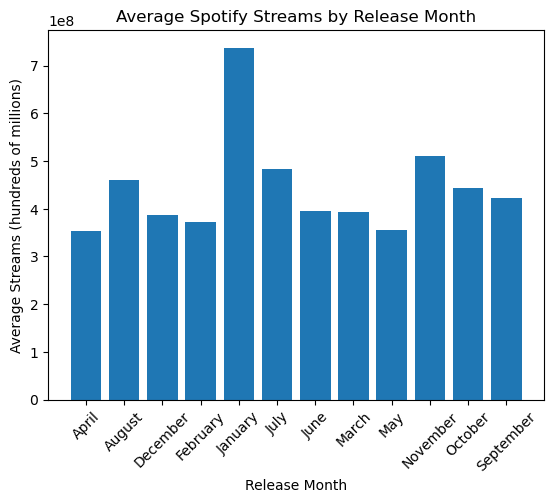

In [12]:
# Average Spotify Steam by month of release
months = monthly_stats.index

plt.bar(months, monthly_stats)
plt.title('Average Spotify Streams by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Average Streams (hundreds of millions)')
plt.xticks(rotation=45)
plt.show()

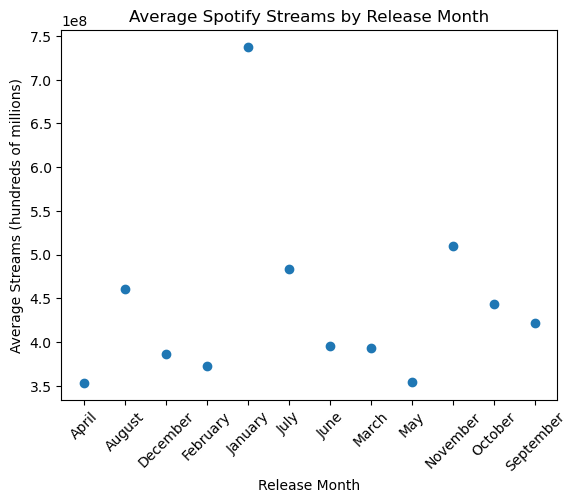

In [25]:
# plot scatter graph for month of release vs average number of streams

plt.scatter(months, monthly_stats)
plt.title('Average Spotify Streams by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Average Streams (hundreds of millions)')
plt.xticks(rotation=45)
plt.show()

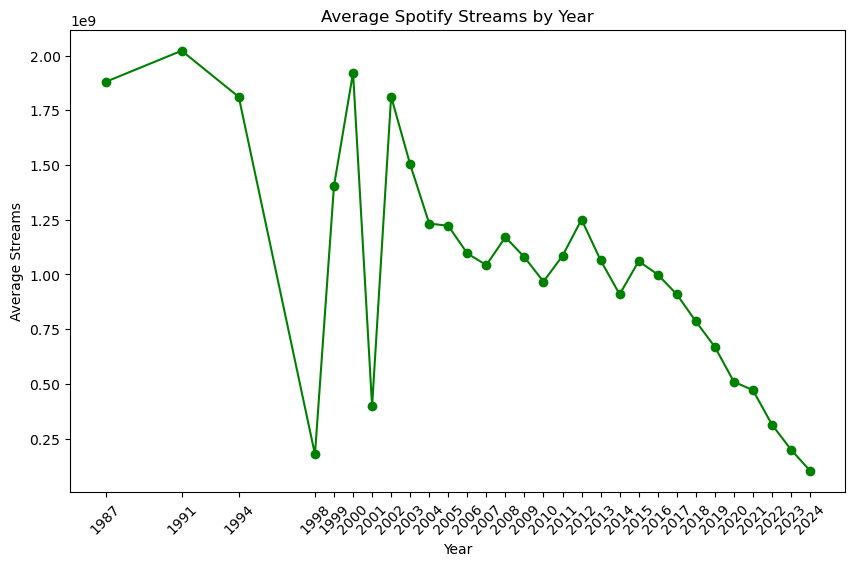

In [15]:
# Yearly Average Spotify Streams
yearly_avg = song_data.groupby('Year')['Spotify Streams'].mean()
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', linestyle='-', color='green')
plt.title('Average Spotify Streams by Year')
plt.xlabel('Year')
plt.ylabel('Average Streams')
#plt.grid(True)
plt.xticks(yearly_avg.index, rotation=45) 
plt.show()

C:\Users\15199\AppData\Local\Temp\ipykernel_39900\4284801113.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_avg = song_data.groupby('Seasons')['Track Score'].mean().sort_values()


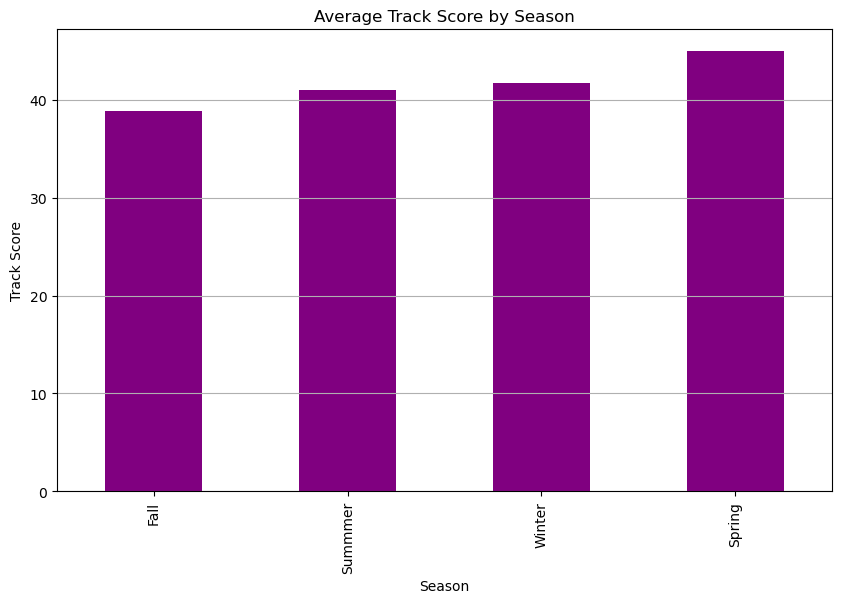

In [16]:
# Bar Graph for Seasonal Differences in Track Scores

seasonal_avg = song_data.groupby('Seasons')['Track Score'].mean().sort_values()
plt.figure(figsize=(10, 6))
seasonal_avg.plot(kind='bar', color='purple')
plt.title('Average Track Score by Season')
plt.xlabel('Season')
plt.ylabel('Track Score')
plt.grid(True, axis='y')
plt.show()

# Research Question: Are there specific artists that perform better across multiple platforms? Explore trends in performance

In [38]:
# Grouping by artist
artist_group = reduced_songdata.groupby(['Artist'])
mean_artist = artist_group[['Spotify Streams','YouTube Views','TikTok Views','Pandora Streams']].mean()
mean_artist = mean_artist.dropna()

# Sorting by highest stream/views across platforms

# Spotify
spotify_sort = mean_artist.sort_values(['Spotify Streams'],ascending=False)['Spotify Streams']
spotify_top10 = spotify_sort.head(10)
spotify_xvalues = spotify_top10.index

# Youtube Views
youtube_sort = mean_artist.sort_values(['YouTube Views'],ascending=False)['YouTube Views']
youtube_top10 = youtube_sort.head(10)
youtube_xvalues = youtube_top10.index

# TikTok views 
tittok_sort = mean_artist.sort_values(['TikTok Views'],ascending=False)['TikTok Views']
titok_top10 = tittok_sort.head(10)
titok_xvalues = titok_top10.index

# Pandora Streams
pandora_sort = mean_artist.sort_values(['Pandora Streams'],ascending=False)['Pandora Streams']
pandora_top10 = pandora_sort.head(10)
pandora_xvalues = pandora_top10.index



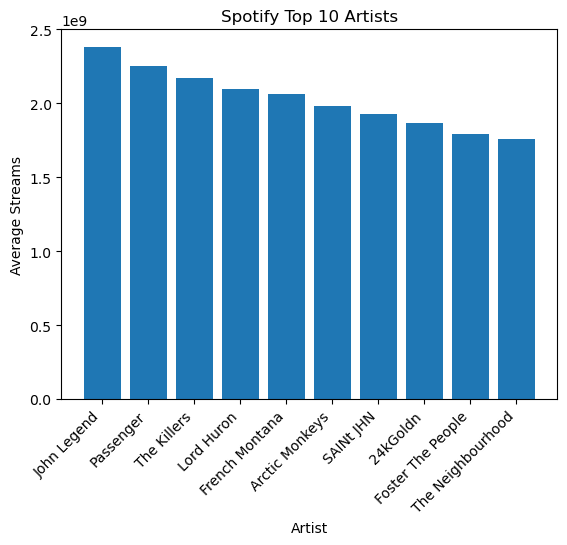

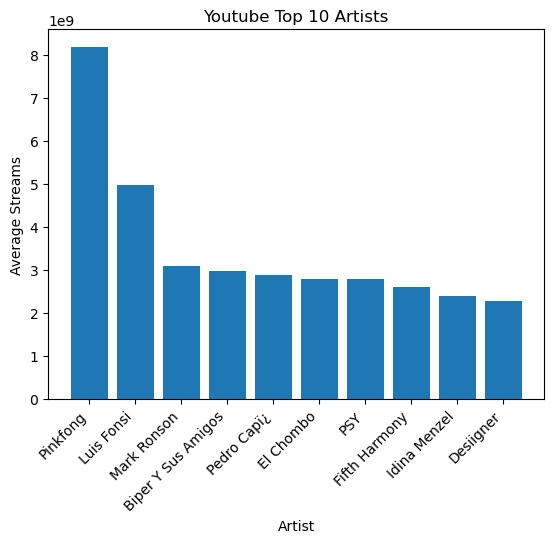

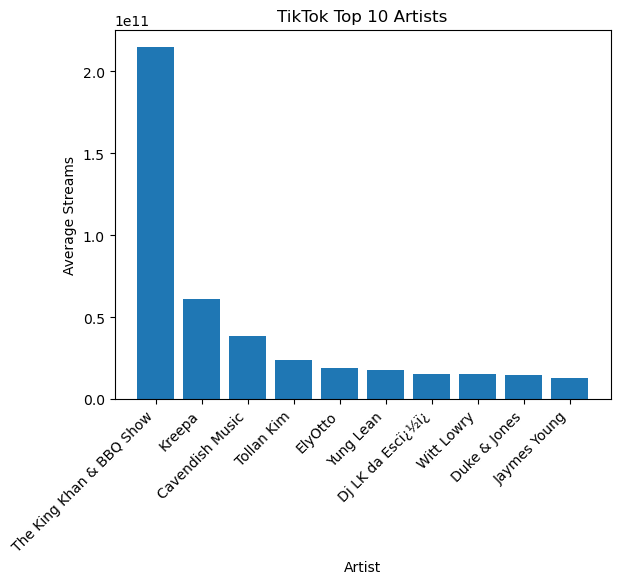

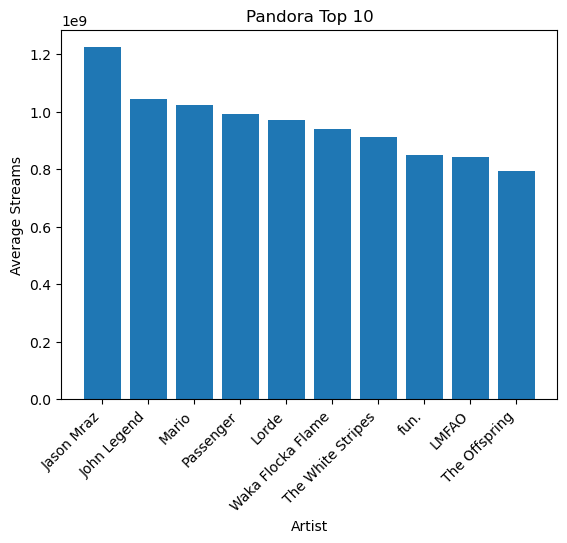

In [57]:
# Plotting top 10 graphs

# Spotify top 10
plt.bar(spotify_xvalues, spotify_top10)
plt.xlabel('Artist')
plt.ylabel('Average Streams')
plt.xticks(rotation=45,ha='right')
plt.title('Spotify Top 10 Artists')
plt.show()

# Youtube Top 10
plt.bar(youtube_xvalues, youtube_top10)
plt.xlabel('Artist')
plt.ylabel('Average Streams')
plt.title('Youtube Top 10 Artists')
plt.xticks(rotation=45,ha='right')
plt.show()

# TikTok Top 10
plt.bar(titok_xvalues, titok_top10)
plt.xlabel('Artist')
plt.ylabel('Average Streams')
plt.title('TikTok Top 10 Artists')
plt.xticks(rotation=45,ha='right')
plt.show()

# Pandora Top 10
plt.bar(pandora_xvalues, pandora_top10)
plt.xlabel('Artist')
plt.ylabel('Average Streams')
plt.title('Pandora Top 10 Artists')
plt.xticks(rotation=45,ha='right')
plt.show()
